In [48]:
import pandas as pd
df = pd.read_csv("mirror_publications_etherscan.csv")
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_nft,week_google_searches_crypto,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,26,100,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,26,100,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,26,100,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,26,100,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0


In [49]:
# Calcoliamo i terzili per dividere i dati in 3 classi bilanciate
terzili = df["Success"].quantile([1/3, 2/3]).values

# Creiamo la colonna "SuccessClass3" in base ai terzili
df["SuccessClass3"] = pd.cut(df["Success"], bins=[-float("inf"), terzili[0], terzili[1], float("inf")], labels=[0, 1, 2])

# Calcoliamo i quartili per dividere i dati in 4 classi bilanciate
quartili = df["Success"].quantile([1/4, 2/4, 3/4]).values

# Creiamo la colonna "SuccessClass4" in base ai quartili
df["SuccessClass4"] = pd.cut(df["Success"], bins=[-float("inf"), quartili[0], quartili[1], quartili[2], float("inf")], labels=[0, 1, 2, 3])

# Verifica delle distribuzioni
class_counts_3 = df["SuccessClass3"].value_counts()
class_counts_4 = df["SuccessClass4"].value_counts()

class_counts_3, class_counts_4

(SuccessClass3
 0    11745
 2     8736
 1     6394
 Name: count, dtype: int64,
 SuccessClass4
 0    8624
 3    6688
 2    5881
 1    5682
 Name: count, dtype: int64)

In [50]:
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number,SuccessClass3,SuccessClass4
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0,2,3
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0,2,3
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0,0,0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0,2,3
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0,0,1
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0,1,2
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0,0,0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0,1,1


<h1 style="color:red;">Random forest - Binaria</h1>

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
F1 score sul training set: 0.7192129781126401

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.74      0.66      0.69      2665
           1       0.70      0.77      0.73      2710

    accuracy                           0.71      5375
   macro avg       0.72      0.71      0.71      5375
weighted avg       0.72      0.71      0.71      5375

Confusion Matrix:
[[1753  912]
 [ 628 2082]]


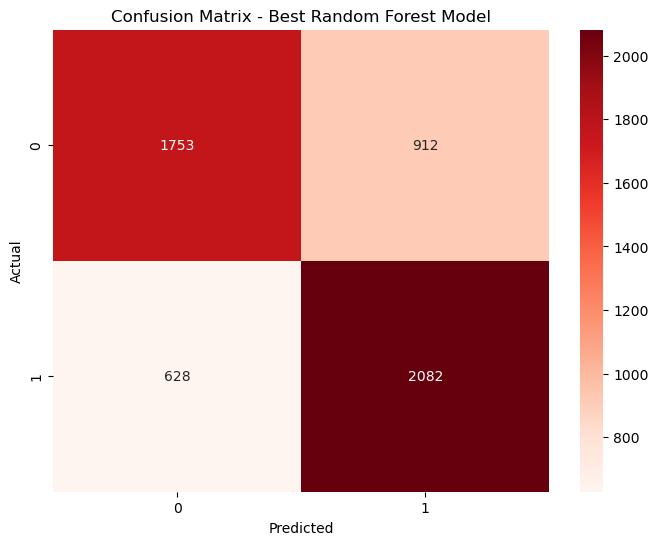

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
F1 score sul training set: 0.861806687290715

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2665
           1       0.85      0.87      0.86      2710

    accuracy                           0.86      5375
   macro avg       0.86      0.86      0.86      5375
weighted avg       0.86      0.86      0.86      5375

Confusion Matrix:
[[2240  425]
 [ 349 2361]]


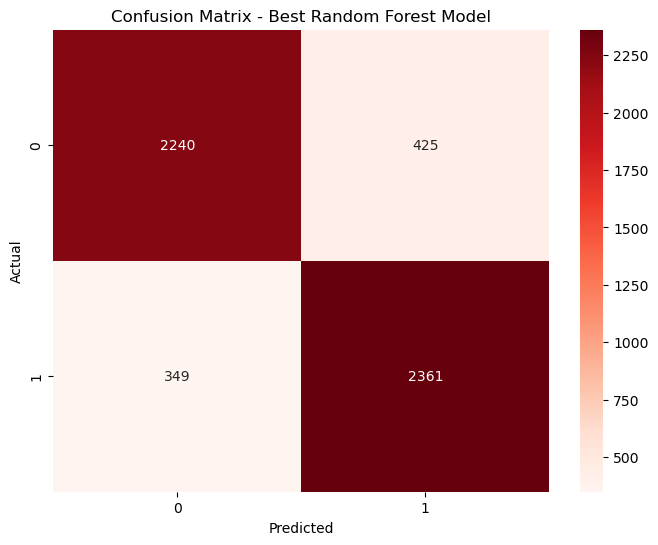

In [54]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
F1 score sul training set: 0.859834435287655

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2665
           1       0.85      0.86      0.86      2710

    accuracy                           0.85      5375
   macro avg       0.85      0.85      0.85      5375
weighted avg       0.85      0.85      0.85      5375

Confusion Matrix:
[[2260  405]
 [ 377 2333]]


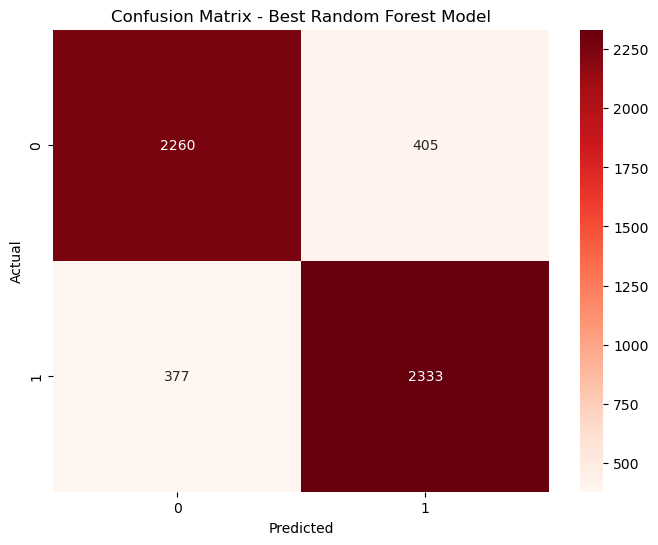

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

<h1 style="color:red;">Random forest - 3 classi</h1>

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
F1 score sul training set: 0.49435456297034003

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.63      0.75      0.68      2349
           1       0.44      0.15      0.23      1279
           2       0.56      0.69      0.62      1747

    accuracy                           0.59      5375
   macro avg       0.54      0.53      0.51      5375
weighted avg       0.56      0.59      0.56      5375

Confusion Matrix:
[[1758  136  455]
 [ 602  196  481]
 [ 424  114 1209]]


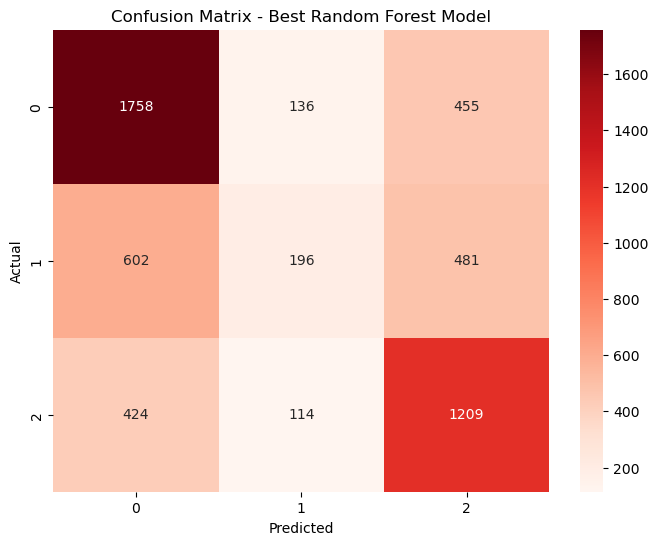

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dati
text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass3']

# Suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1_macro',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
F1 score sul training set: 0.7195712723128432

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2349
           1       0.59      0.47      0.52      1279
           2       0.79      0.86      0.82      1747

    accuracy                           0.76      5375
   macro avg       0.73      0.72      0.72      5375
weighted avg       0.75      0.76      0.75      5375

Confusion Matrix:
[[1991  240  118]
 [ 402  600  277]
 [  65  184 1498]]


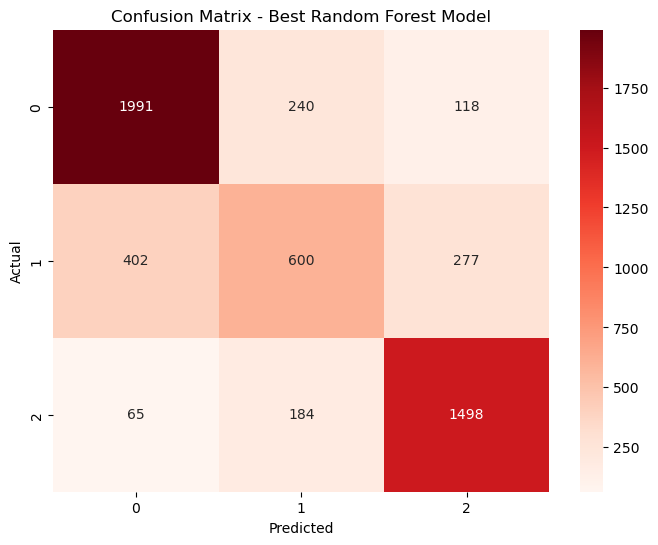

In [58]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1_macro',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
F1 score sul training set: 0.6915262762084234

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      2349
           1       0.62      0.37      0.46      1279
           2       0.79      0.87      0.83      1747

    accuracy                           0.76      5375
   macro avg       0.73      0.71      0.71      5375
weighted avg       0.74      0.76      0.74      5375

Confusion Matrix:
[[2078  167  104]
 [ 498  473  308]
 [ 103  122 1522]]


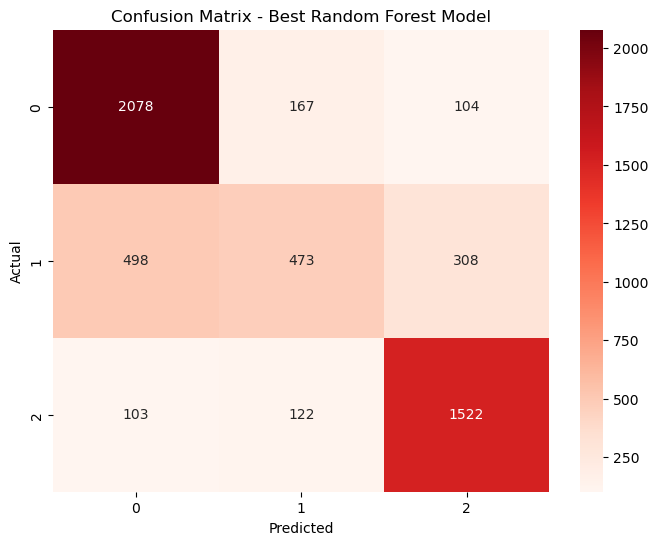

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1_macro',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

<h1 style="color:red;">Random forest - 4 classi</h1>

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
F1 score sul training set: 0.4200582178100227

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.53      0.68      0.60      1725
           1       0.37      0.16      0.22      1136
           2       0.40      0.27      0.33      1176
           3       0.47      0.66      0.55      1338

    accuracy                           0.48      5375
   macro avg       0.44      0.44      0.42      5375
weighted avg       0.45      0.48      0.45      5375

Confusion Matrix:
[[1175  122  140  288]
 [ 488  181  162  305]
 [ 324  126  322  404]
 [ 217   58  177  886]]


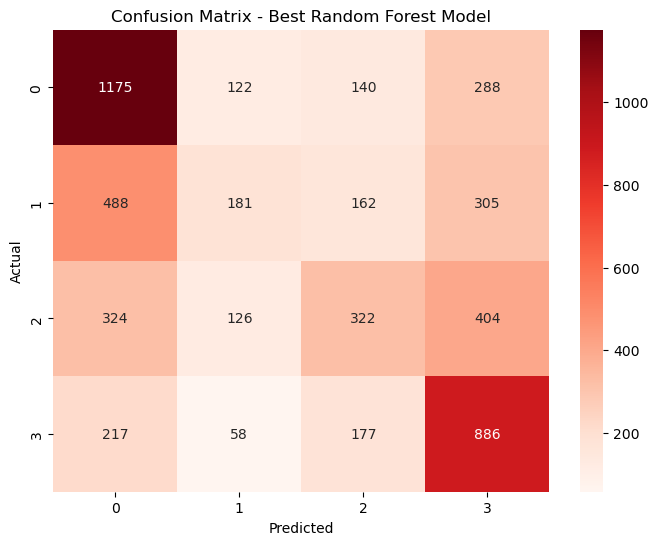

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dati
text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass4']

# Suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1_macro',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
F1 score sul training set: 0.6689255223107095

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1725
           1       0.55      0.52      0.54      1136
           2       0.59      0.57      0.58      1176
           3       0.76      0.82      0.79      1338

    accuracy                           0.68      5375
   macro avg       0.67      0.67      0.67      5375
weighted avg       0.68      0.68      0.68      5375

Confusion Matrix:
[[1316  251  116   42]
 [ 289  593  179   75]
 [ 100  186  666  224]
 [  22   49  167 1100]]


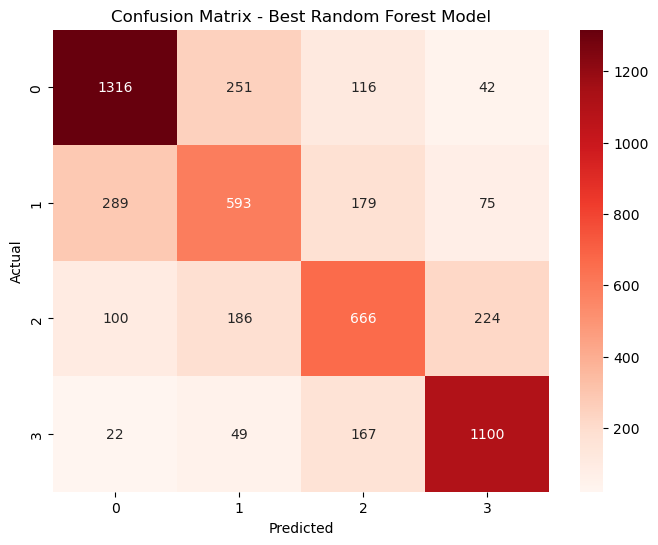

In [75]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1_macro',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Migliori iperparametri: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
F1 score sul training set: 0.6519801013733023

Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.74      0.82      0.77      1725
           1       0.59      0.48      0.53      1136
           2       0.60      0.52      0.56      1176
           3       0.76      0.86      0.80      1338

    accuracy                           0.69      5375
   macro avg       0.67      0.67      0.67      5375
weighted avg       0.68      0.69      0.68      5375

Confusion Matrix:
[[1406  170  100   49]
 [ 335  550  173   78]
 [ 147  177  611  241]
 [  23   29  141 1145]]


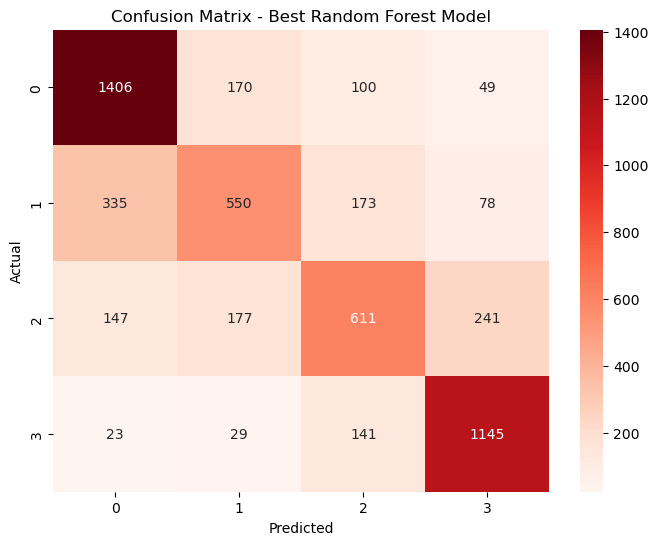

In [77]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definizione del modello base
rf_base = RandomForestClassifier(random_state=42)

# Dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1_macro',  # puoi cambiare in 'accuracy', 'precision', 'recall' o 'roc_auc'
    n_jobs=-1,  # usa tutti i core disponibili
    verbose=2
)

# Fit del GridSearch
grid_search.fit(X_train, y_train)

# Miglior modello trovato
print("Migliori iperparametri:", grid_search.best_params_)
print("F1 score sul training set:", grid_search.best_score_)

# Test sul test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Confusion Matrix - visualizzazione
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", 
            xticklabels=grid_search.best_estimator_.classes_, 
            yticklabels=grid_search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()